In [2]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
from collections import Counter

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
# !pip install nltk
# nltk.download("stopwords")

In [35]:
df = pd.read_csv('./data/datav1.csv', sep=';')
df2 = pd.read_csv('./data/data_done.csv', sep=';')

In [36]:
df2 = df2[df2['common'] >= 0]

In [37]:
df = df.append(df2, ignore_index=True)

In [38]:
df.shape

(763, 4)

In [39]:
print(int(df['common'].sum()), '/', df['common'].count())

302 / 763


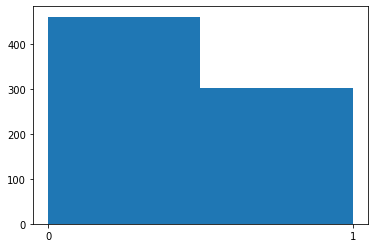

In [42]:
plt.hist(df.common, bins=2, range=[0,1])
plt.xticks([0,1]);

In [43]:
re_punct = re.compile(f'[{string.punctuation}0-9\– ]+')
russian_stopwords = stopwords.words("russian")
morpher = MorphAnalyzer()

def punct(text):
    return re.sub(re_punct, ' ', text)

def clear(arr):
    return [w for w in arr if not w in russian_stopwords]

def lemmatize(arr):
    pass

def prepare_text(text):
    text = punct(text)
    t_arr = clear(text.split())
    return ' '.join(t_arr)

def pos(text):
    tags = [str(morpher.parse(w)[0].tag) for w in text.split(' ')]
    return Counter(tags)

In [44]:
df['prepared'] = df.apply(lambda row: prepare_text(f"{row['title']} {row['short']} {row['text']}"), axis=1)

In [45]:
bag_of_words = set()
bow_tags = set()

for txt in df['prepared'][:5]:
    for w in txt.split(' '):
        bag_of_words.add(w)
        bow_tags = bow_tags | set([str(morpher.parse(w)[0].tag)])

In [46]:
tags_cols = list(bow_tags)

In [47]:
dff = df[['common']].copy()
tags_shape = [df.shape[0], len(tags_cols)]
dff[tags_cols] = np.zeros(tags_shape)

In [48]:
for index, row in df.iterrows():
    pos_dict = pos(row['prepared'])
    for key, value in pos_dict.items():
        if key in bow_tags:
            dff.iloc[index][key] = value

In [49]:
dff.describe()

,common,"VERB,impf,intr masc,sing,past,indc","ADJF,Qual plur,ablt","ADVB,Prdx","GRND,impf,intr pres",PRCL,"ADJF,Qual plur,datv","NOUN,inan,GNdr,Pltm plur,nomn","PRTF,perf,tran,past,pssv masc,sing,loct","NOUN,anim,masc,Name sing,loct",...,"PRTF,perf,tran,past,pssv plur,gent","NOUN,inan,neut plur,gent","ADJF,Qual femn,sing,gent","VERB,perf,intr femn,sing,past,indc","NOUN,anim,masc sing,nomn","NOUN,anim,GNdr,Pltm plur,datv",NUMR nomn,"VERB,impf,tran plur,past,indc","ADJF masc,sing,gent","NOUN,anim,masc,Name sing,datv"
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,0.395806,0.923984,0.583224,1.241153,0.195282,3.152031,0.363041,0.145478,0.028834,0.204456,...,0.094364,1.349934,1.545216,1.842726,3.302752,0.155963,0.432503,0.714286,0.934469,0.705111
std,0.489344,1.648825,0.913205,1.290805,0.472197,2.425359,0.674272,0.414393,0.167448,0.671998,...,0.388830,1.468643,1.572062,2.061752,2.902860,0.512879,0.850563,1.049756,1.301485,1.285213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,3.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,17.000000,5.000000,9.000000,3.000000,13.000000,4.000000,3.000000,1.000000,5.000000,...,5.000000,9.000000,8.000000,12.000000,20.000000,4.000000,8.000000,7.000000,9.000000,8.000000


In [50]:
dff.to_csv('./data/train.csv', index=False, sep=';')